In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-4ydcz3ms
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-4ydcz3ms
  Resolved https://github.com/facebookresearch/detectron2.git to commit ebe8b45437f86395352ab13402ba45b75b4d1ddb
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 80.9 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp3

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import cv2
import matplotlib.pyplot as plt

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog,DatasetCatalog

In [ ]:
from detectron2.data.datasets import register_coco_instances
for d in ["train","test"]:
  register_coco_instances(f"microcontroller_{d}",{},f"/content/drive/MyDrive/Microcontroller_Segmentation/{d}.json",f"/content/drive/MyDrive/Microcontroller_Segmentation/{d}")

WARNING [09/12 10:25:30 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/12 10:25:30 d2.data.datasets.coco]: Loaded 142 images in COCO format from /content/drive/MyDrive/Microcontroller_Segmentation/train.json


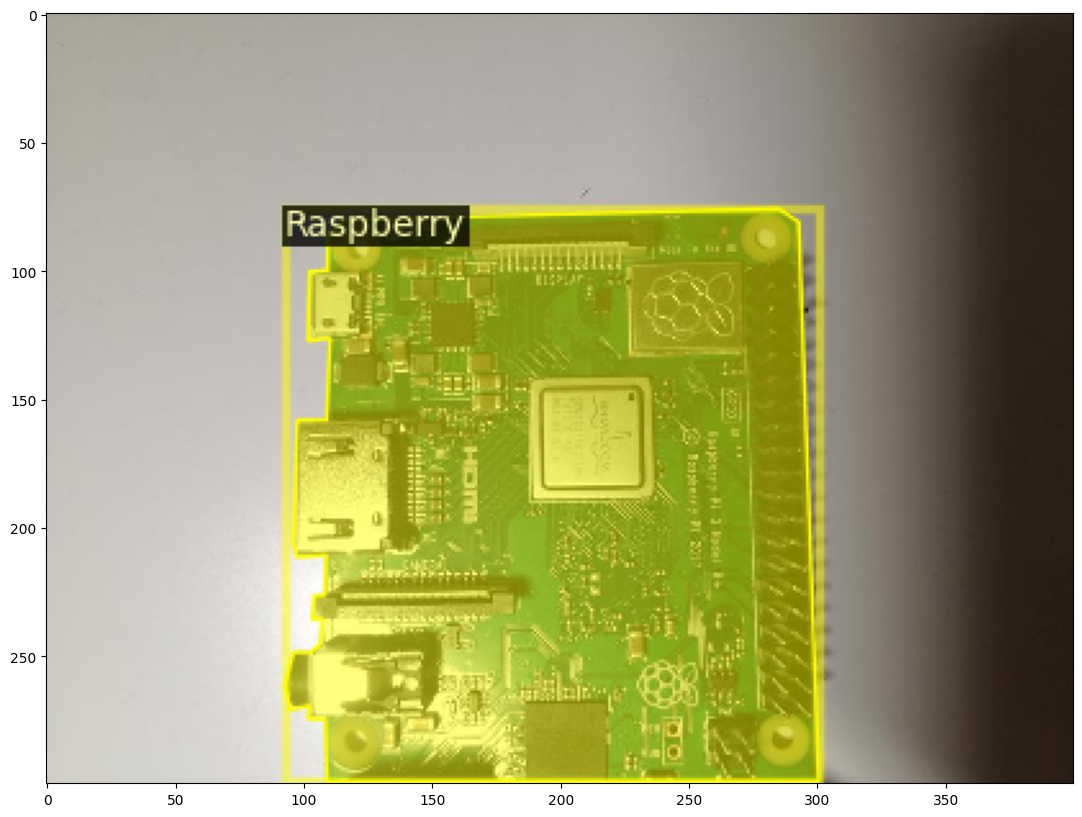

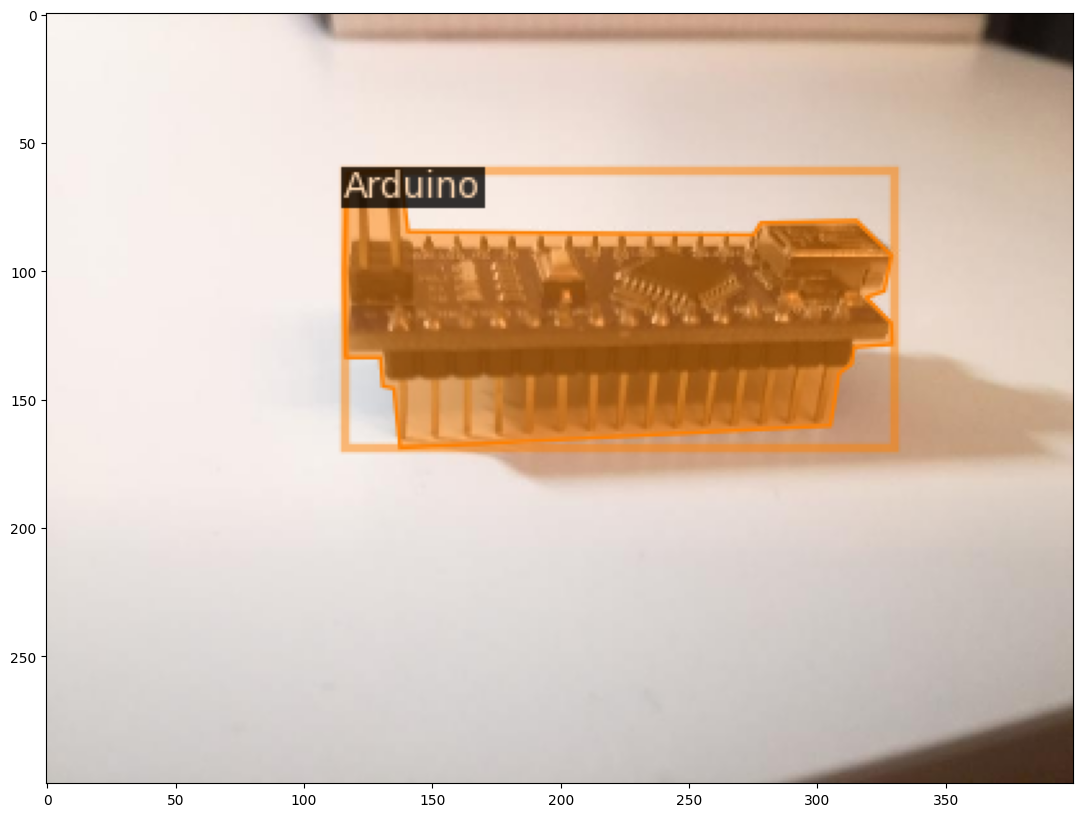

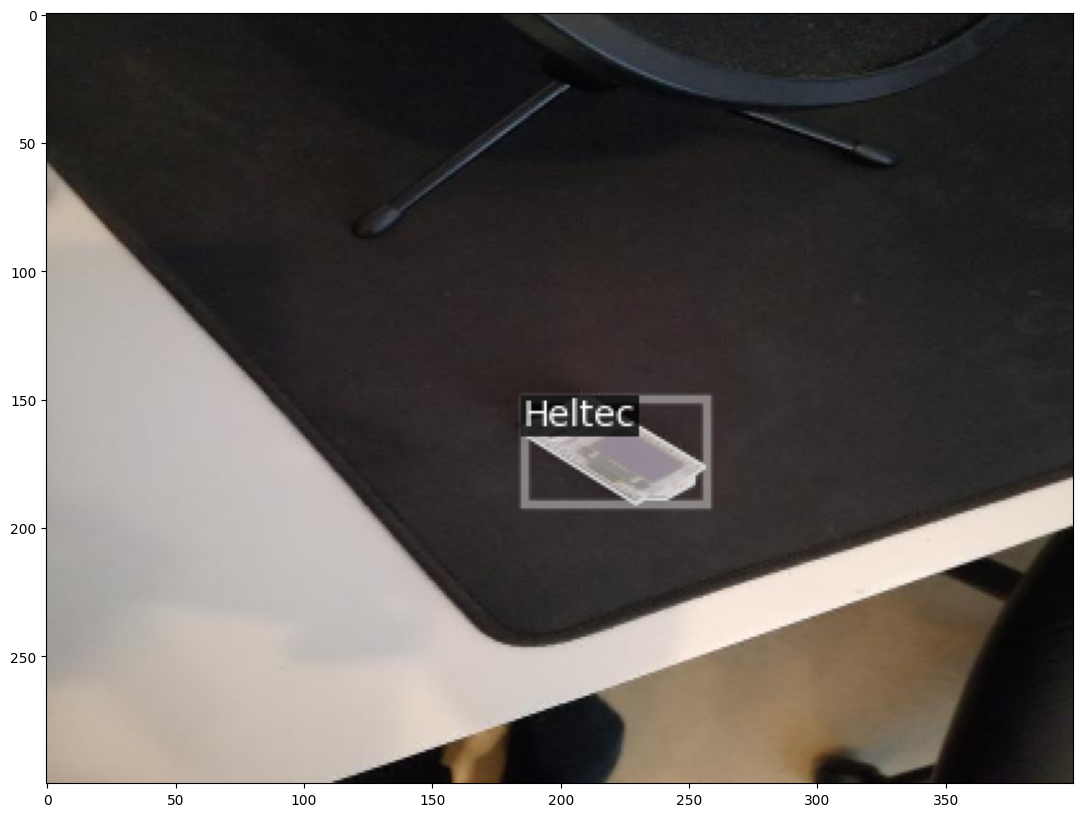

In [ ]:
import random
from detectron2.data import DatasetCatalog,MetadataCatalog

dataset_dicts=DatasetCatalog.get("microcontroller_train")
microcontroller_metadata=MetadataCatalog.get("microcontroller_train")

for d in random.sample(dataset_dicts,3):
  img=cv2.imread(d['file_name'])
  v=Visualizer(img[:,:,::-1],metadata=microcontroller_metadata,scale=0.5)
  v=v.draw_dataset_dict(d)
  plt.figure(figsize=(14,10))
  plt.imshow(cv2.cvtColor(v.get_image()[:,:,::-1],cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg=get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN=("microcontroller_train",)
cfg.DATASETS.TEST=("microcontroller_test",)
cfg.DATALOADER.NUM_WORKERS=2
cfg.MODEL.WEIGHTS=model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH=2
cfg.SOLVER.BASE_LR=0.00025
cfg.SOLVER.MAX_ITER=2000
cfg.SOLVER.STEPS=[]
cfg.MODEL.ROI_HEADS.NUM_CLASSES=4

os.makedirs(cfg.OUTPUT_DIR,exist_ok=True)
trainer=DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[09/12 11:14:30 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[09/12 11:14:30 d2.engine.train_loop]: Starting training from iteration 0


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[09/12 11:14:40 d2.utils.events]:  eta: 0:16:32  iter: 19  total_loss: 2.657  loss_cls: 1.783  loss_box_reg: 0.1461  loss_mask: 0.6872  loss_rpn_cls: 0.005581  loss_rpn_loc: 0.002924    time: 0.4992  last_time: 0.5149  data_time: 0.0228  last_data_time: 0.0368   lr: 4.9953e-06  max_mem: 2925M
[09/12 11:14:50 d2.utils.events]:  eta: 0:16:39  iter: 39  total_loss: 2.433  loss_cls: 1.59  loss_box_reg: 0.1205  loss_mask: 0.6859  loss_rpn_cls: 0.007752  loss_rpn_loc: 0.00408    time: 0.5032  last_time: 0.4867  data_time: 0.0073  last_data_time: 0.0080   lr: 9.9902e-06  max_mem: 2926M
[09/12 11:15:00 d2.utils.events]:  eta: 0:15:59  iter: 59  total_loss: 2.066  loss_cls: 1.238  loss_box_reg: 0.1355  loss_mask: 0.6772  loss_rpn_cls: 0.0102  loss_rpn_loc: 0.004488    time: 0.4971  last_time: 0.4269  data_time: 0.0133  last_data_time: 0.0065   lr: 1.4985e-05  max_mem: 2926M
[09/12 11:15:10 d2.utils.events]:  eta: 0:15:55  iter: 79  total_loss: 1.703  loss_cls: 0.8402  loss_box_reg: 0.1748  loss

In [ ]:
cfg.MODEL.WEIGHTS=os.path.join(cfg.OUTPUT_DIR,"model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST=0.5
cfg.DATASETS.TEST=("microcontroller_test",)
predictor=DefaultPredictor(cfg)

[09/12 11:31:53 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


WARNING [09/12 11:31:53 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/12 11:31:53 d2.data.datasets.coco]: Loaded 142 images in COCO format from /content/drive/MyDrive/Microcontroller_Segmentation/train.json


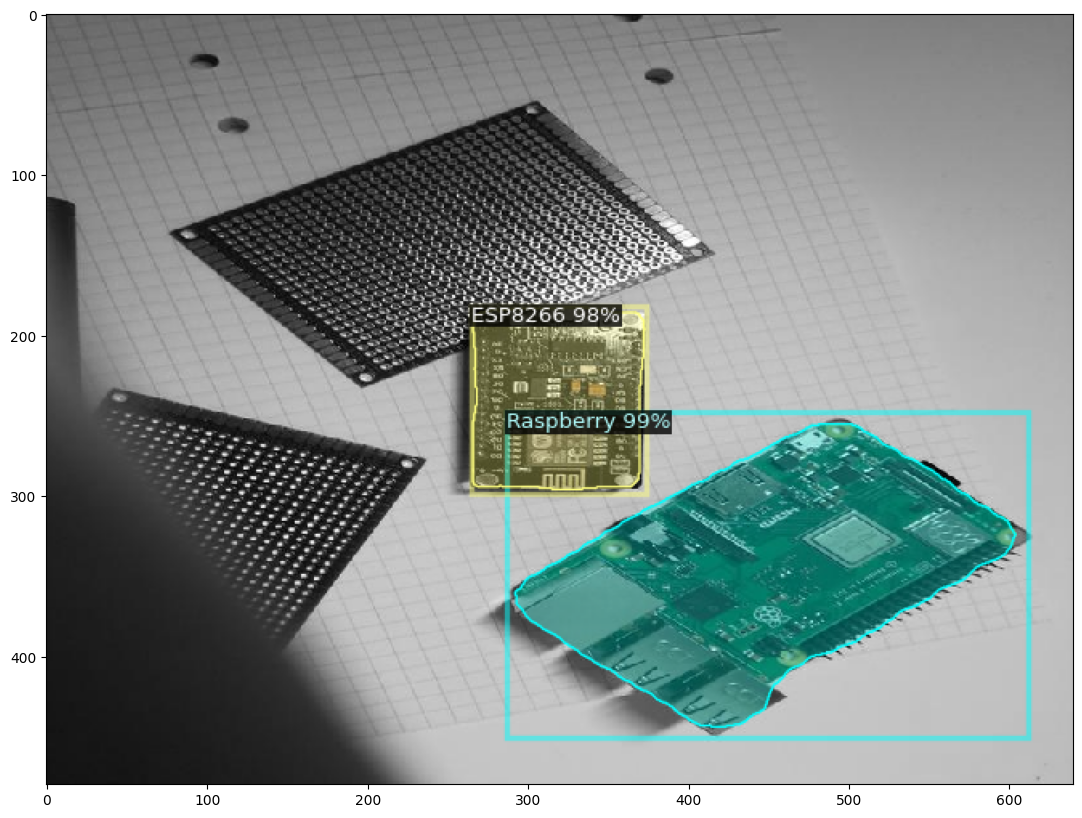

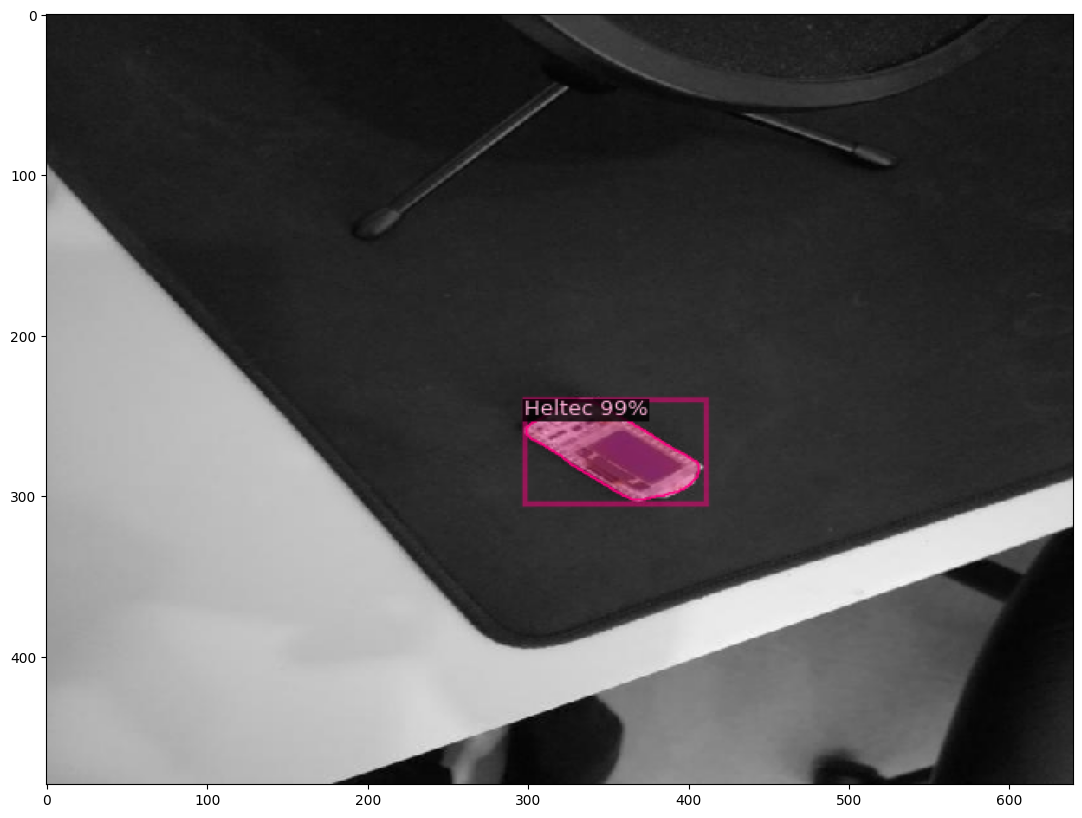

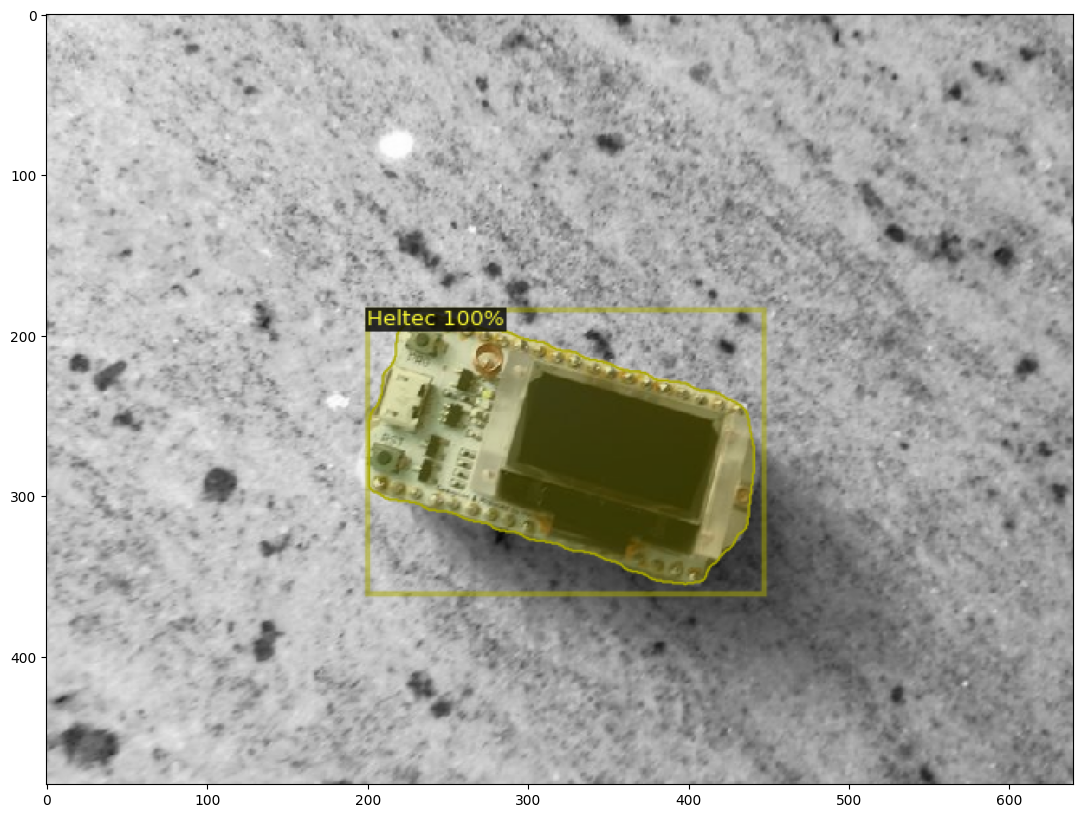

In [ ]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts=DatasetCatalog.get("microcontroller_train")
for d in random.sample(dataset_dicts,3):
  im=cv2.imread(d["file_name"])
  outputs=predictor(im)
  v=Visualizer(im[:,:,::-1],metadata=microcontroller_metadata,
                    scale=0.8,
                    instance_mode=ColorMode.IMAGE_BW)
  v=v.draw_instance_predictions(outputs["instances"].to("cpu"))
  plt.figure(figsize=(14,10))
  plt.imshow(cv2.cvtColor(v.get_image()[:,:,::-1],cv2.COLOR_BGR2RGB))
  plt.show()